<a href="https://colab.research.google.com/github/DarainHyder/AI_Labs/blob/main/EDA_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Dataset**

In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import dataset from kaggle
import os
os.environ['KAGGLE_USERNAME'] = 'sawabedarain'
os.environ['KAGGLE_KEY'] = '70cea822f78ea919c86ce0b8c2d83dee'
!cp kaggle.json /root/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 /root/.kaggle/kaggle.json

import kaggle

In [9]:
# download dataset
!kaggle datasets download -d uciml/iris

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 14.1MB/s]


In [10]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [20]:
## show head
df = pd.read_csv('Iris.csv')

In [14]:
df.shape

(150, 6)

In [18]:
  df.columns.to_list()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [21]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [26]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [32]:
# drop ID rows
df = df.drop('Id', axis=1)

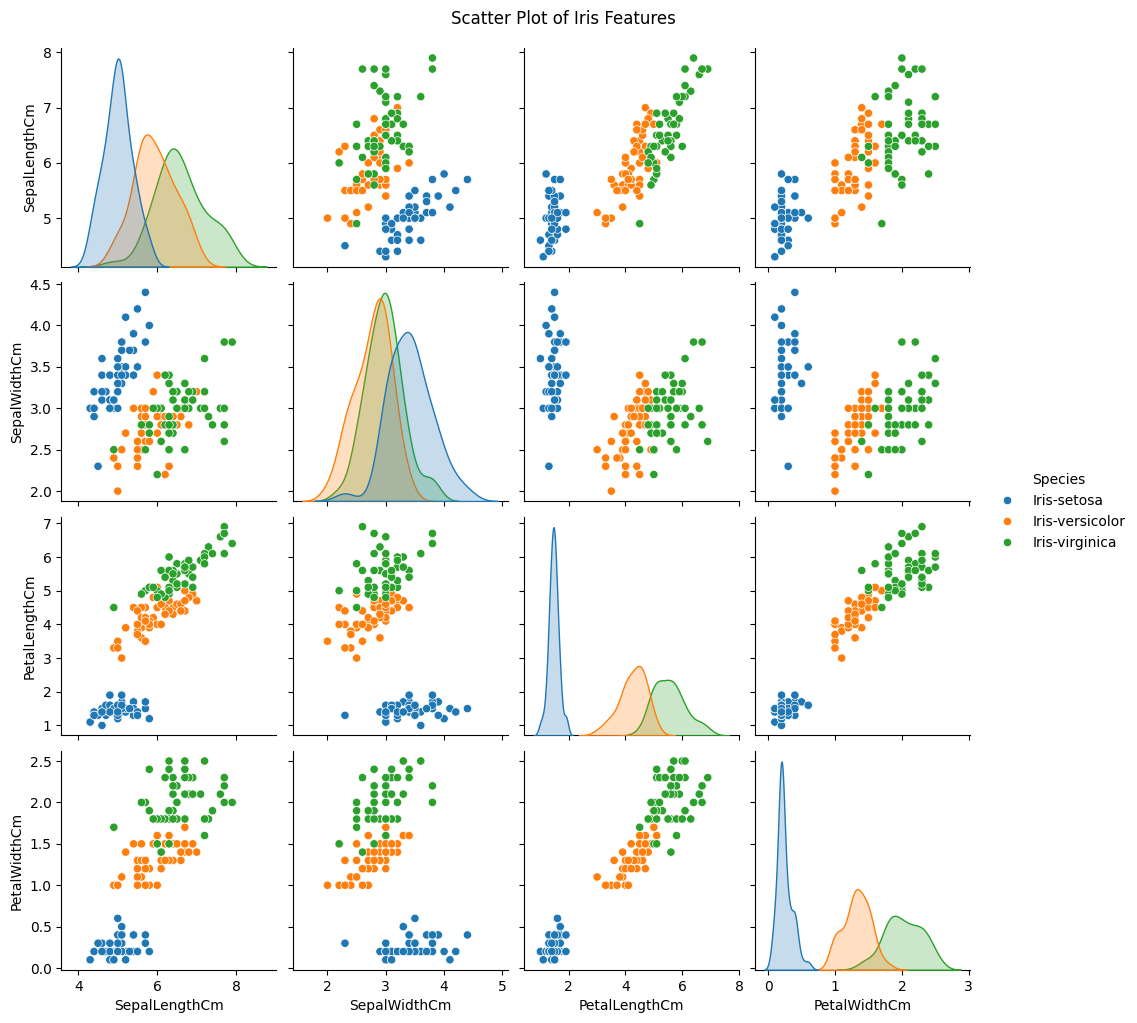

In [33]:
# Scatterpot
sns.pairplot(df, hue="Species")
plt.suptitle("Scatter Plot of Iris Features", y=1.02)
plt.show()

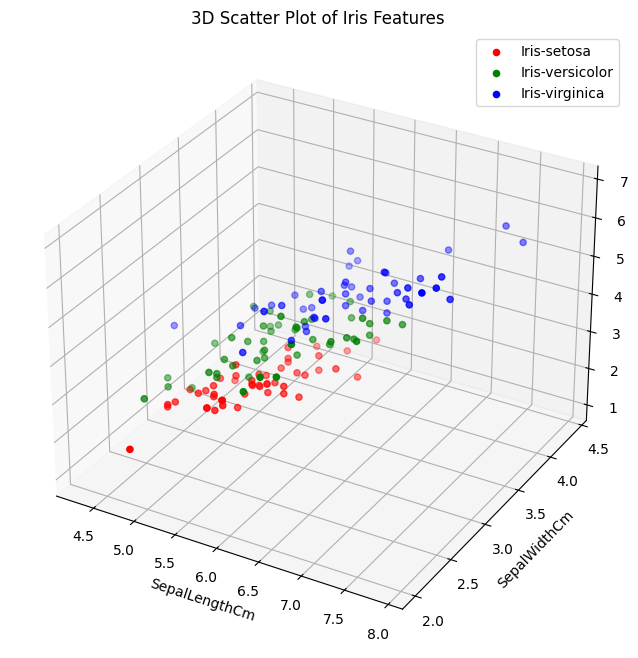

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# three features for the 3D plot
feature1 = 'SepalLengthCm'
feature2 = 'SepalWidthCm'
feature3 = 'PetalLengthCm'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get unique species
species = df['Species'].unique()

# Define colors for each species
colors = ['r', 'g', 'b']

# Plot data points for each species
for i, s in enumerate(species):
    ax.scatter(df[df['Species'] == s][feature1],
               df[df['Species'] == s][feature2],
               df[df['Species'] == s][feature3],
               c=colors[i], label=s)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('3D Scatter Plot of Iris Features')
ax.legend()

plt.show()

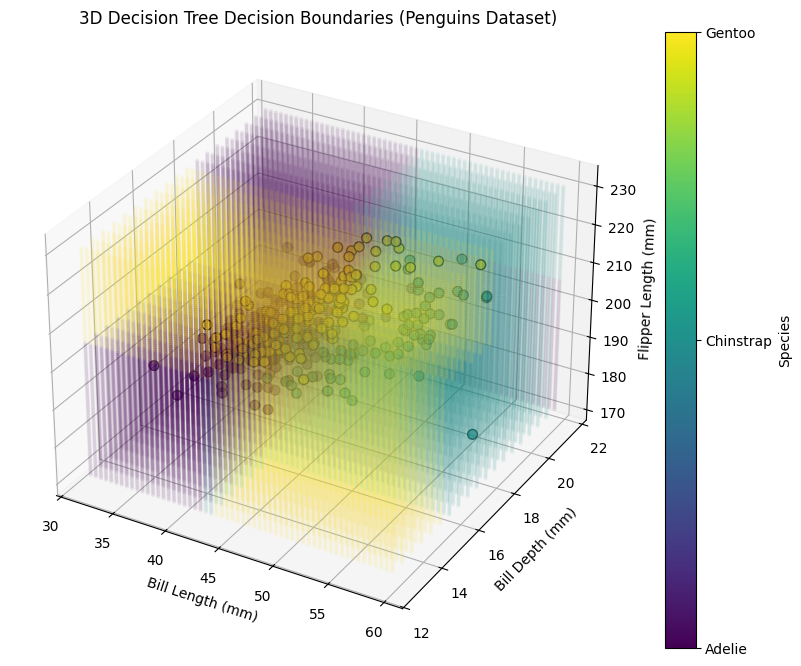

3D Decision Tree Accuracy (on visualization features): 0.988


In [64]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Select three features for 3D visualization (using numerical features from the penguins dataset)
X_vis_3d = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]
y_vis_3d = df["species"]

# Encode labels for the species column
le = LabelEncoder()
y_vis_3d_encoded = le.fit_transform(y_vis_3d)


# Train a new decision tree on these 3 features
# We need to train a classifier here to plot the decision boundaries
# Using a shallow tree for visualization purposes
clf_3d = DecisionTreeClassifier(random_state=42, max_depth=4) # Increased max_depth for better separation
clf_3d.fit(X_vis_3d, y_vis_3d_encoded)

# Create a mesh grid for 3D
x_min, x_max = X_vis_3d.iloc[:, 0].min() - 0.5, X_vis_3d.iloc[:, 0].max() + 0.5
y_min, y_max = X_vis_3d.iloc[:, 1].min() - 0.5, X_vis_3d.iloc[:, 1].max() + 0.5
z_min, z_max = X_vis_3d.iloc[:, 2].min() - 0.5, X_vis_3d.iloc[:, 2].max() + 0.5

# Create a denser meshgrid for better visualization
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.5), # Increased step for performance
                         np.arange(y_min, y_max, 0.5), # Increased step for performance
                         np.arange(z_min, z_max, 0.5)) # Increased step for performance


# Predict class for each point in the mesh
# Reshape the meshgrid points to be compatible with predict
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

# Predict in batches to avoid memory issues if necessary, but for this dataset it should be fine
Z = clf_3d.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(X_vis_3d.iloc[:, 0], X_vis_3d.iloc[:, 1], X_vis_3d.iloc[:, 2],
                     c=y_vis_3d_encoded, cmap='viridis', edgecolors='k', s=50)

# Plot decision boundaries by plotting a subsample of the mesh points
# We'll plot the mesh points with colors based on their predicted class
# To avoid plotting too many points, we'll take a subset
step = 1 # Adjust this value to control the density of the boundary points. Reduced step after increasing meshgrid step
ax.scatter(xx[::step, ::step, ::step].ravel(),
           yy[::step, ::step, ::step].ravel(),
           zz[::step, ::step, ::step].ravel(),
           c=Z[::step, ::step, ::step].ravel(),
           alpha=0.05,  # Make the boundary points translucent
           cmap='viridis',
           marker='.')


# Set labels and title
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')
ax.set_title('3D Decision Tree Decision Boundaries (Penguins Dataset)')

# Add color bar
# Use the encoder classes for tick labels
cbar = fig.colorbar(scatter, ticks=[0, 1, 2], label='Species')
cbar.ax.set_yticklabels(le.classes_)


plt.show()

print(f"3D Decision Tree Accuracy (on visualization features): {clf_3d.score(X_vis_3d, y_vis_3d_encoded):.3f}")

# Decision Tree

In [35]:
# Importing Libraries for Model Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
# Features and target
X = df.drop("Species", axis=1)
y = df["Species"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [38]:
# Train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


In [39]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9333333333333333

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



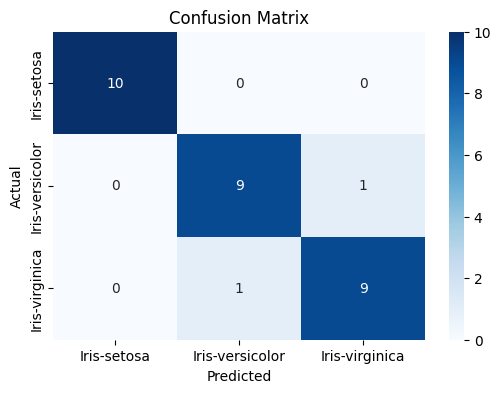

In [40]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

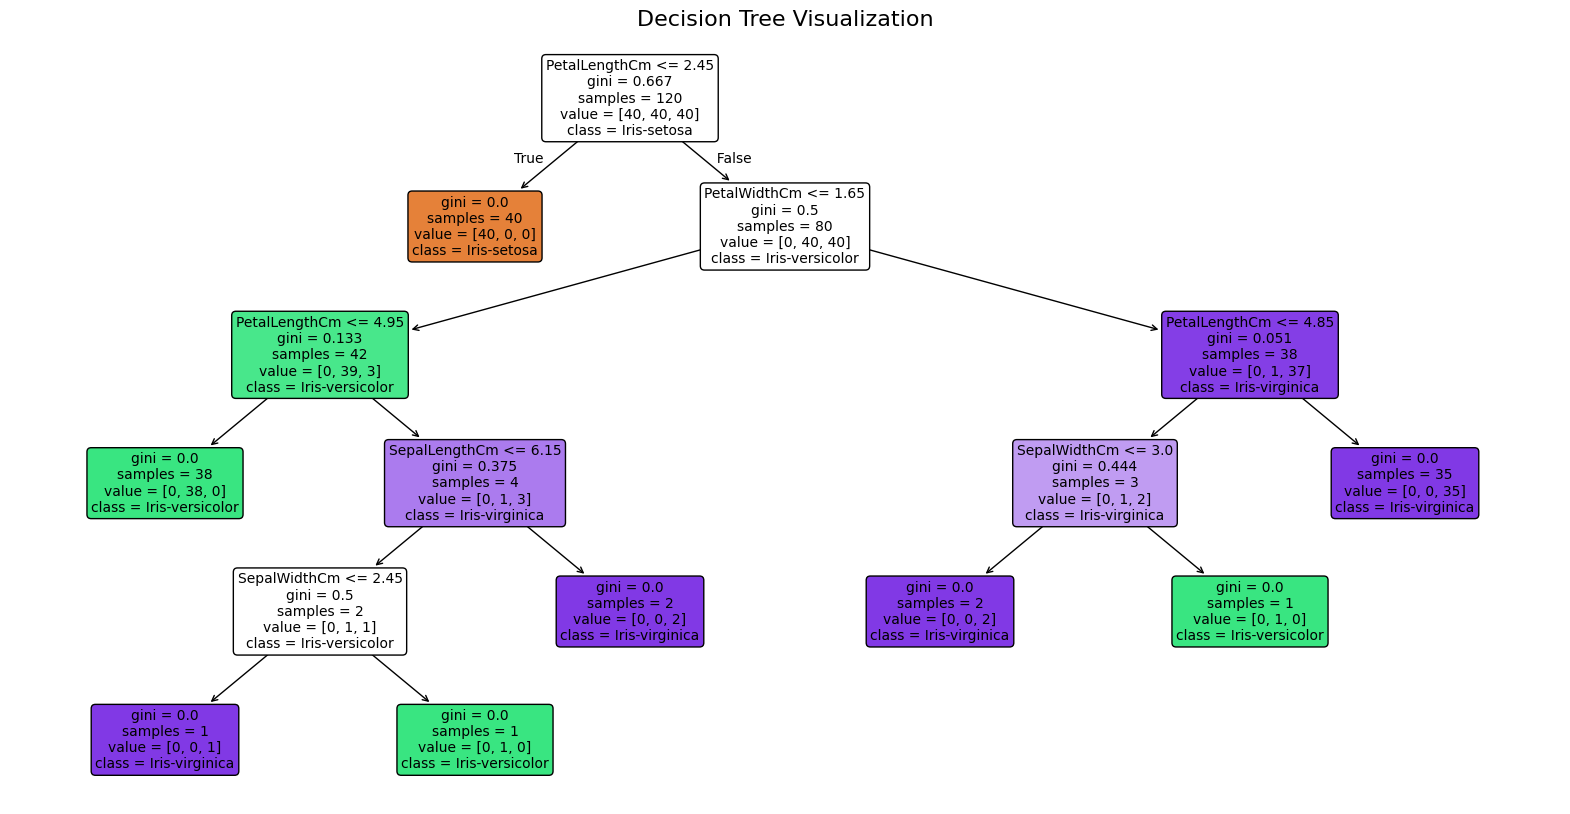

Decision Tree Rules:
|--- PetalLengthCm <= 2.45
|   |--- class: 0
|--- PetalLengthCm >  2.45
|   |--- PetalWidthCm <= 1.65
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- class: 1
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- SepalLengthCm <= 6.15
|   |   |   |   |--- SepalWidthCm <= 2.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- SepalWidthCm >  2.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- SepalLengthCm >  6.15
|   |   |   |   |--- class: 2
|   |--- PetalWidthCm >  1.65
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- SepalWidthCm <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- SepalWidthCm >  3.00
|   |   |   |   |--- class: 1
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: 2



In [41]:
# Visualize the Decision Tree Structure
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Print text representation of the tree
print("Decision Tree Rules:")
print("=" * 50)
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

In [ ]:
'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species'

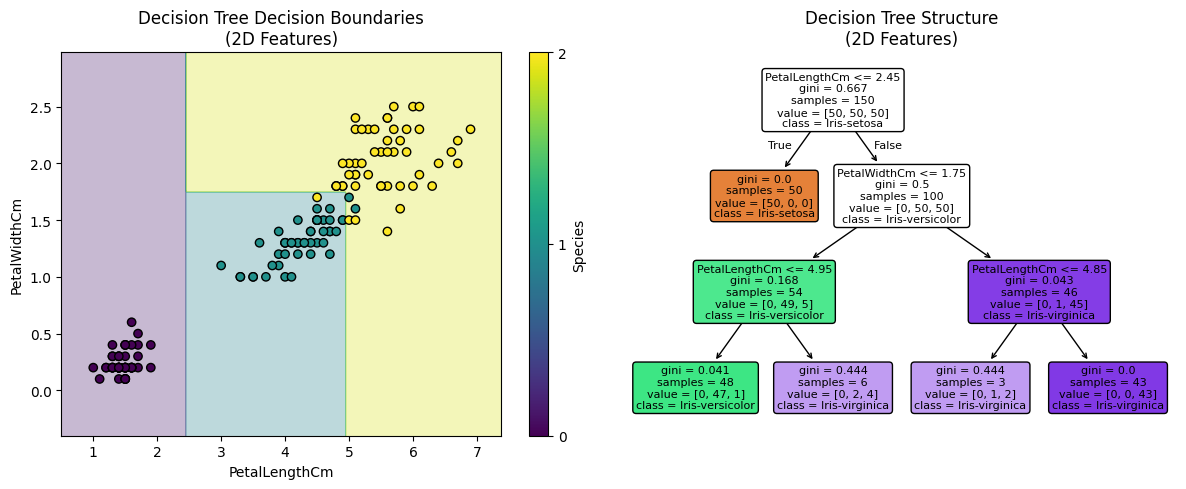

2D Decision Tree Accuracy: 0.973
Original 4D Decision Tree Accuracy: 0.933


In [44]:
# Decision Tree Decision Boundaries Visualization
import numpy as np

# Select two features for 2D visualization (petal_length and petal_width work well)
X_vis = df[["PetalLengthCm", "PetalWidthCm"]]
y_vis = le.fit_transform(df["Species"])

# Train a new decision tree on just these 2 features
clf_2d = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_2d.fit(X_vis, y_vis)

# Create a mesh grid
x_min, x_max = X_vis.iloc[:, 0].min() - 0.5, X_vis.iloc[:, 0].max() + 0.5
y_min, y_max = X_vis.iloc[:, 1].min() - 0.5, X_vis.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(12, 5))

# First subplot: Decision boundaries
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap='viridis', edgecolors='black')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Decision Tree Decision Boundaries\n(2D Features)')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Species')

# Second subplot: The 2D decision tree structure
plt.subplot(1, 2, 2)
plot_tree(clf_2d,
          feature_names=['PetalLengthCm', 'PetalWidthCm'],
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title('Decision Tree Structure\n(2D Features)')

plt.tight_layout()
plt.show()

print(f"2D Decision Tree Accuracy: {clf_2d.score(X_vis, y_vis):.3f}")
print(f"Original 4D Decision Tree Accuracy: {clf.score(X_test, y_test):.3f}")

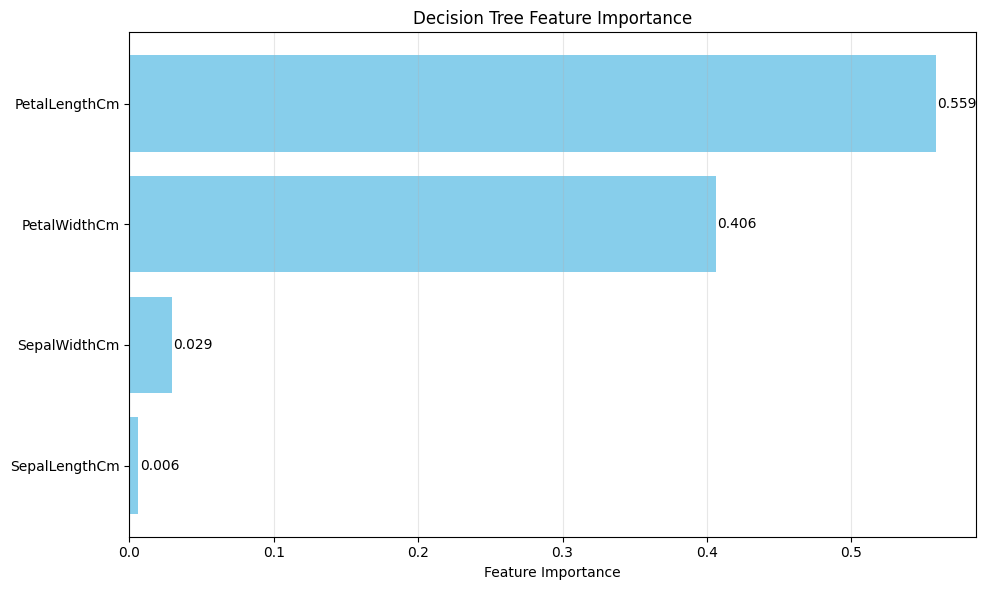

Feature Importance Rankings:
SepalLengthCm  : 0.0062
SepalWidthCm   : 0.0292
PetalWidthCm   : 0.4060
PetalLengthCm  : 0.5586


In [45]:
# Feature Importance Visualization
feature_importance = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.grid(axis='x', alpha=0.3)

# Add importance values on bars
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# Print feature importance values
print("Feature Importance Rankings:")
print("=" * 30)
for feature, importance in zip(importance_df['Feature'], importance_df['Importance']):
    print(f"{feature:15s}: {importance:.4f}")

# **Penguine Dataset**

In [46]:
df = sns.load_dataset('penguins')

In [48]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [53]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [56]:
# drop missing values
df.dropna(inplace=True)

## EDA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [58]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


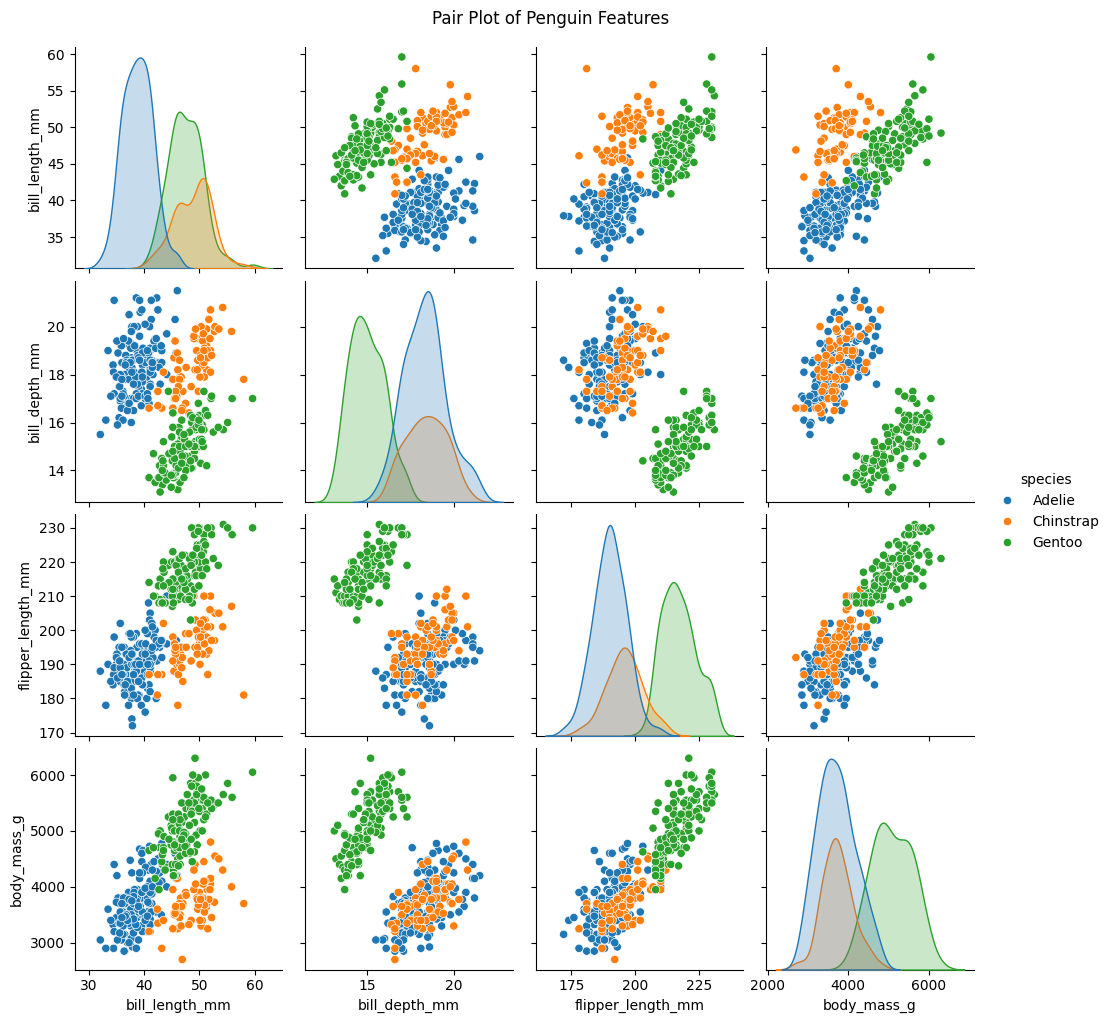

In [59]:
sns.pairplot(df, hue="species")
plt.suptitle("Pair Plot of Penguin Features", y=1.02)
plt.show()

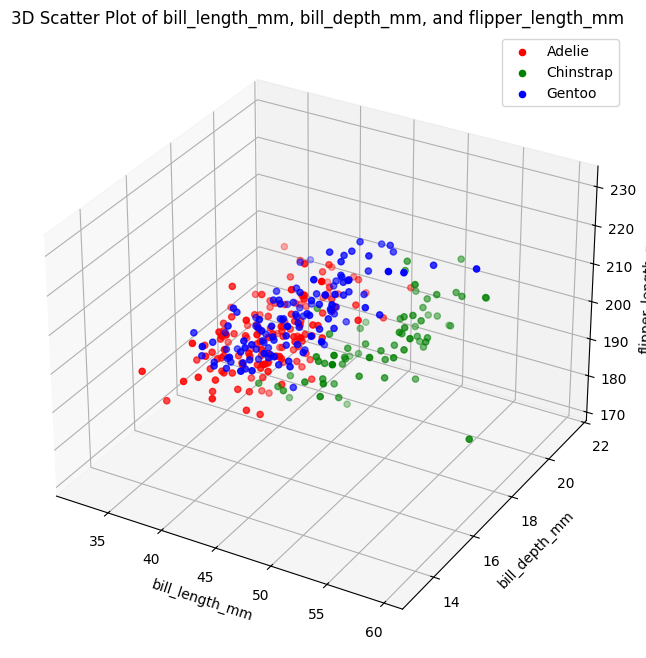

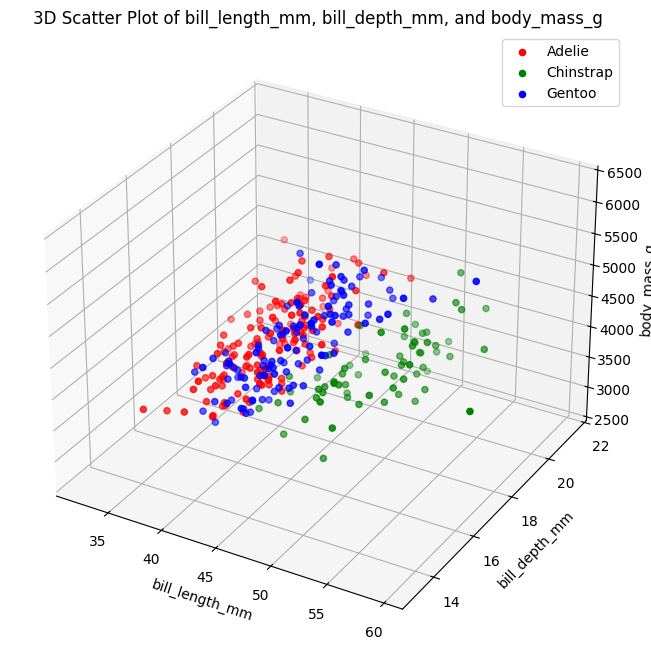

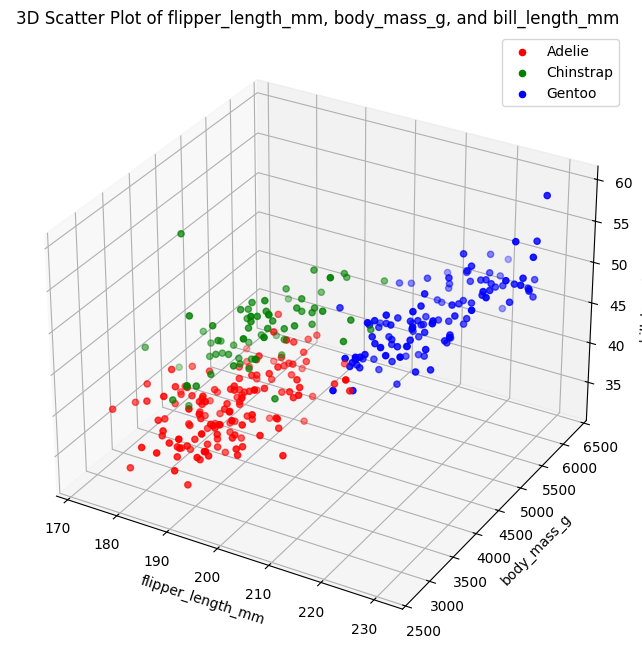

In [60]:
from mpl_toolkits.mplot3d import Axes3D

# Get unique species
species = df['species'].unique()

# Define colors for each species
colors = ['r', 'g', 'b']

# Define combinations of three numerical features
feature_combinations = [
    ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'),
    ('bill_length_mm', 'bill_depth_mm', 'body_mass_g'),
    ('flipper_length_mm', 'body_mass_g', 'bill_length_mm'),
]

for features in feature_combinations:
    feature1, feature2, feature3 = features

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points for each species
    for i, s in enumerate(species):
        ax.scatter(df[df['species'] == s][feature1],
                   df[df['species'] == s][feature2],
                   df[df['species'] == s][feature3],
                   c=colors[i], label=s)

    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(feature3)
    ax.set_title(f'3D Scatter Plot of {feature1}, {feature2}, and {feature3}')
    ax.legend()

    plt.show()